In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler


In [5]:
# Create datasets
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Standardize data
scaler = StandardScaler()
X_moons = scaler.fit_transform(X_moons)
X_blobs = scaler.fit_transform(X_blobs)

# Print first five rows of each dataset to verify
print("Moons Dataset Sample:")
print(X_moons[:5])

print("\nBlobs Dataset Sample:")
print(X_blobs[:5])


Moons Dataset Sample:
[[ 0.14036805 -1.26261004]
 [ 1.6138101  -0.78648207]
 [-0.65506683  0.40974193]
 [ 0.49831585 -0.03172773]
 [ 0.78163614 -1.50238304]]

Blobs Dataset Sample:
[[-1.08613102 -1.29737201]
 [-1.1252075  -1.26267048]
 [-0.02941988  0.95473495]
 [ 1.09738075  0.49631317]
 [-1.23995761 -1.30917379]]


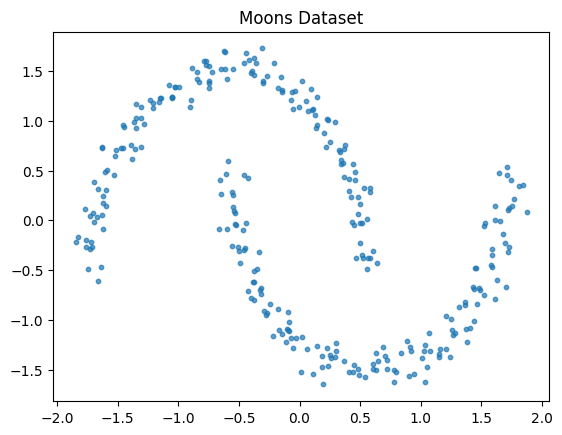

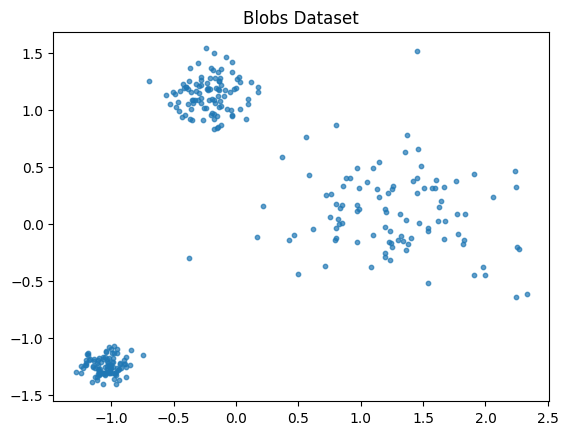

In [8]:
import matplotlib.pyplot as plt

# Function to plot dataset
def plot_dataset(X, title):
    plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
    plt.title(title)
    plt.show()

# Plot both datasets
plot_dataset(X_moons, "Moons Dataset")
plot_dataset(X_blobs, "Blobs Dataset")


In [4]:
# Apply DBSCAN
dbscan_moons = DBSCAN(eps=0.3, min_samples=5).fit(X_moons)
dbscan_blobs = DBSCAN(eps=0.3, min_samples=5).fit(X_blobs)

# Apply k-Means
kmeans_moons = KMeans(n_clusters=2, random_state=42).fit(X_moons)
kmeans_blobs = KMeans(n_clusters=3, random_state=42).fit(X_blobs)

# Apply Hierarchical Clustering
hierarchical_moons = AgglomerativeClustering(n_clusters=2).fit(X_moons)
hierarchical_blobs = AgglomerativeClustering(n_clusters=3).fit(X_blobs)


In [6]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    unique_labels = set(labels)
    for label in unique_labels:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}')
    plt.title(title)
    plt.legend()
    plt.show()


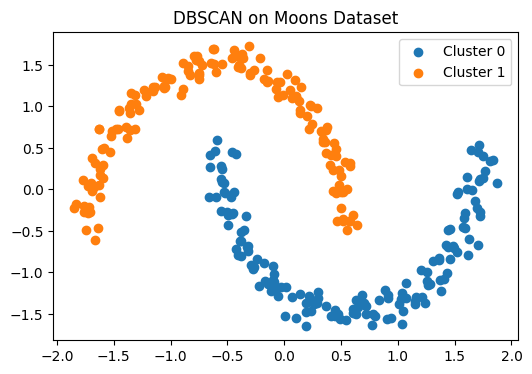

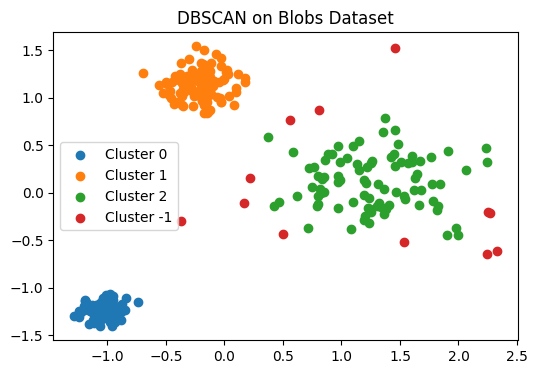

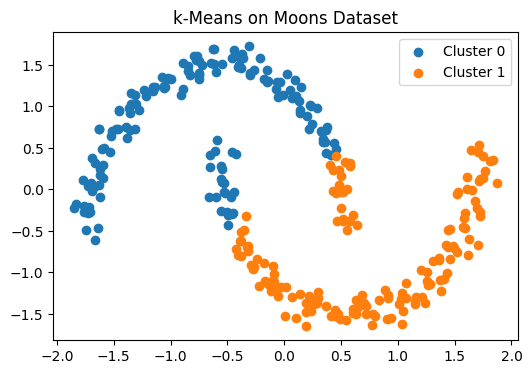

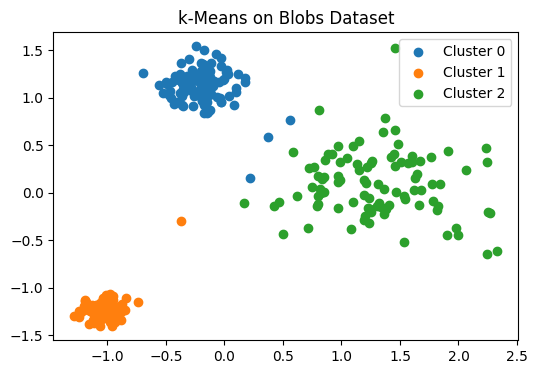

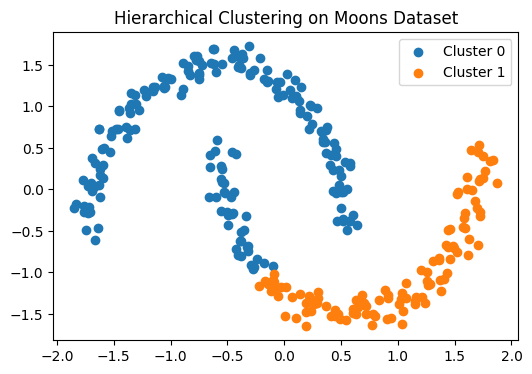

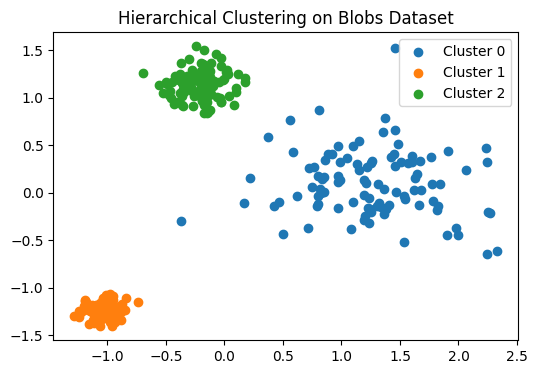

In [7]:
# Convert data to NumPy arrays
X_moons_np, X_blobs_np = np.array(X_moons), np.array(X_blobs)

# Plot results
plot_clusters(X_moons_np, dbscan_moons.labels_, "DBSCAN on Moons Dataset")
plot_clusters(X_blobs_np, dbscan_blobs.labels_, "DBSCAN on Blobs Dataset")

plot_clusters(X_moons_np, kmeans_moons.labels_, "k-Means on Moons Dataset")
plot_clusters(X_blobs_np, kmeans_blobs.labels_, "k-Means on Blobs Dataset")

plot_clusters(X_moons_np, hierarchical_moons.labels_, "Hierarchical Clustering on Moons Dataset")
plot_clusters(X_blobs_np, hierarchical_blobs.labels_, "Hierarchical Clustering on Blobs Dataset")
